In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Dictionary: Bank Customer Churn Dataset


- This dataset is for ABC Multistate bank with following columns:

- customer_id - Customer Account Number, unused variable.
- credit_score, used as input.
- country, used as input.
- gender, used as input.
- age, used as input.
- tenure - number of year that he/she is having bank acount, used as input.
- balance - amount of money that available in customer account, used as input.
- products_number, used as input.
- credit_card is binary data whether they have credit card or not, used as input.
- active_member: is member or not , used as input.
- estimated_salary - customer's salary , used as input
- churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [2]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [40]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

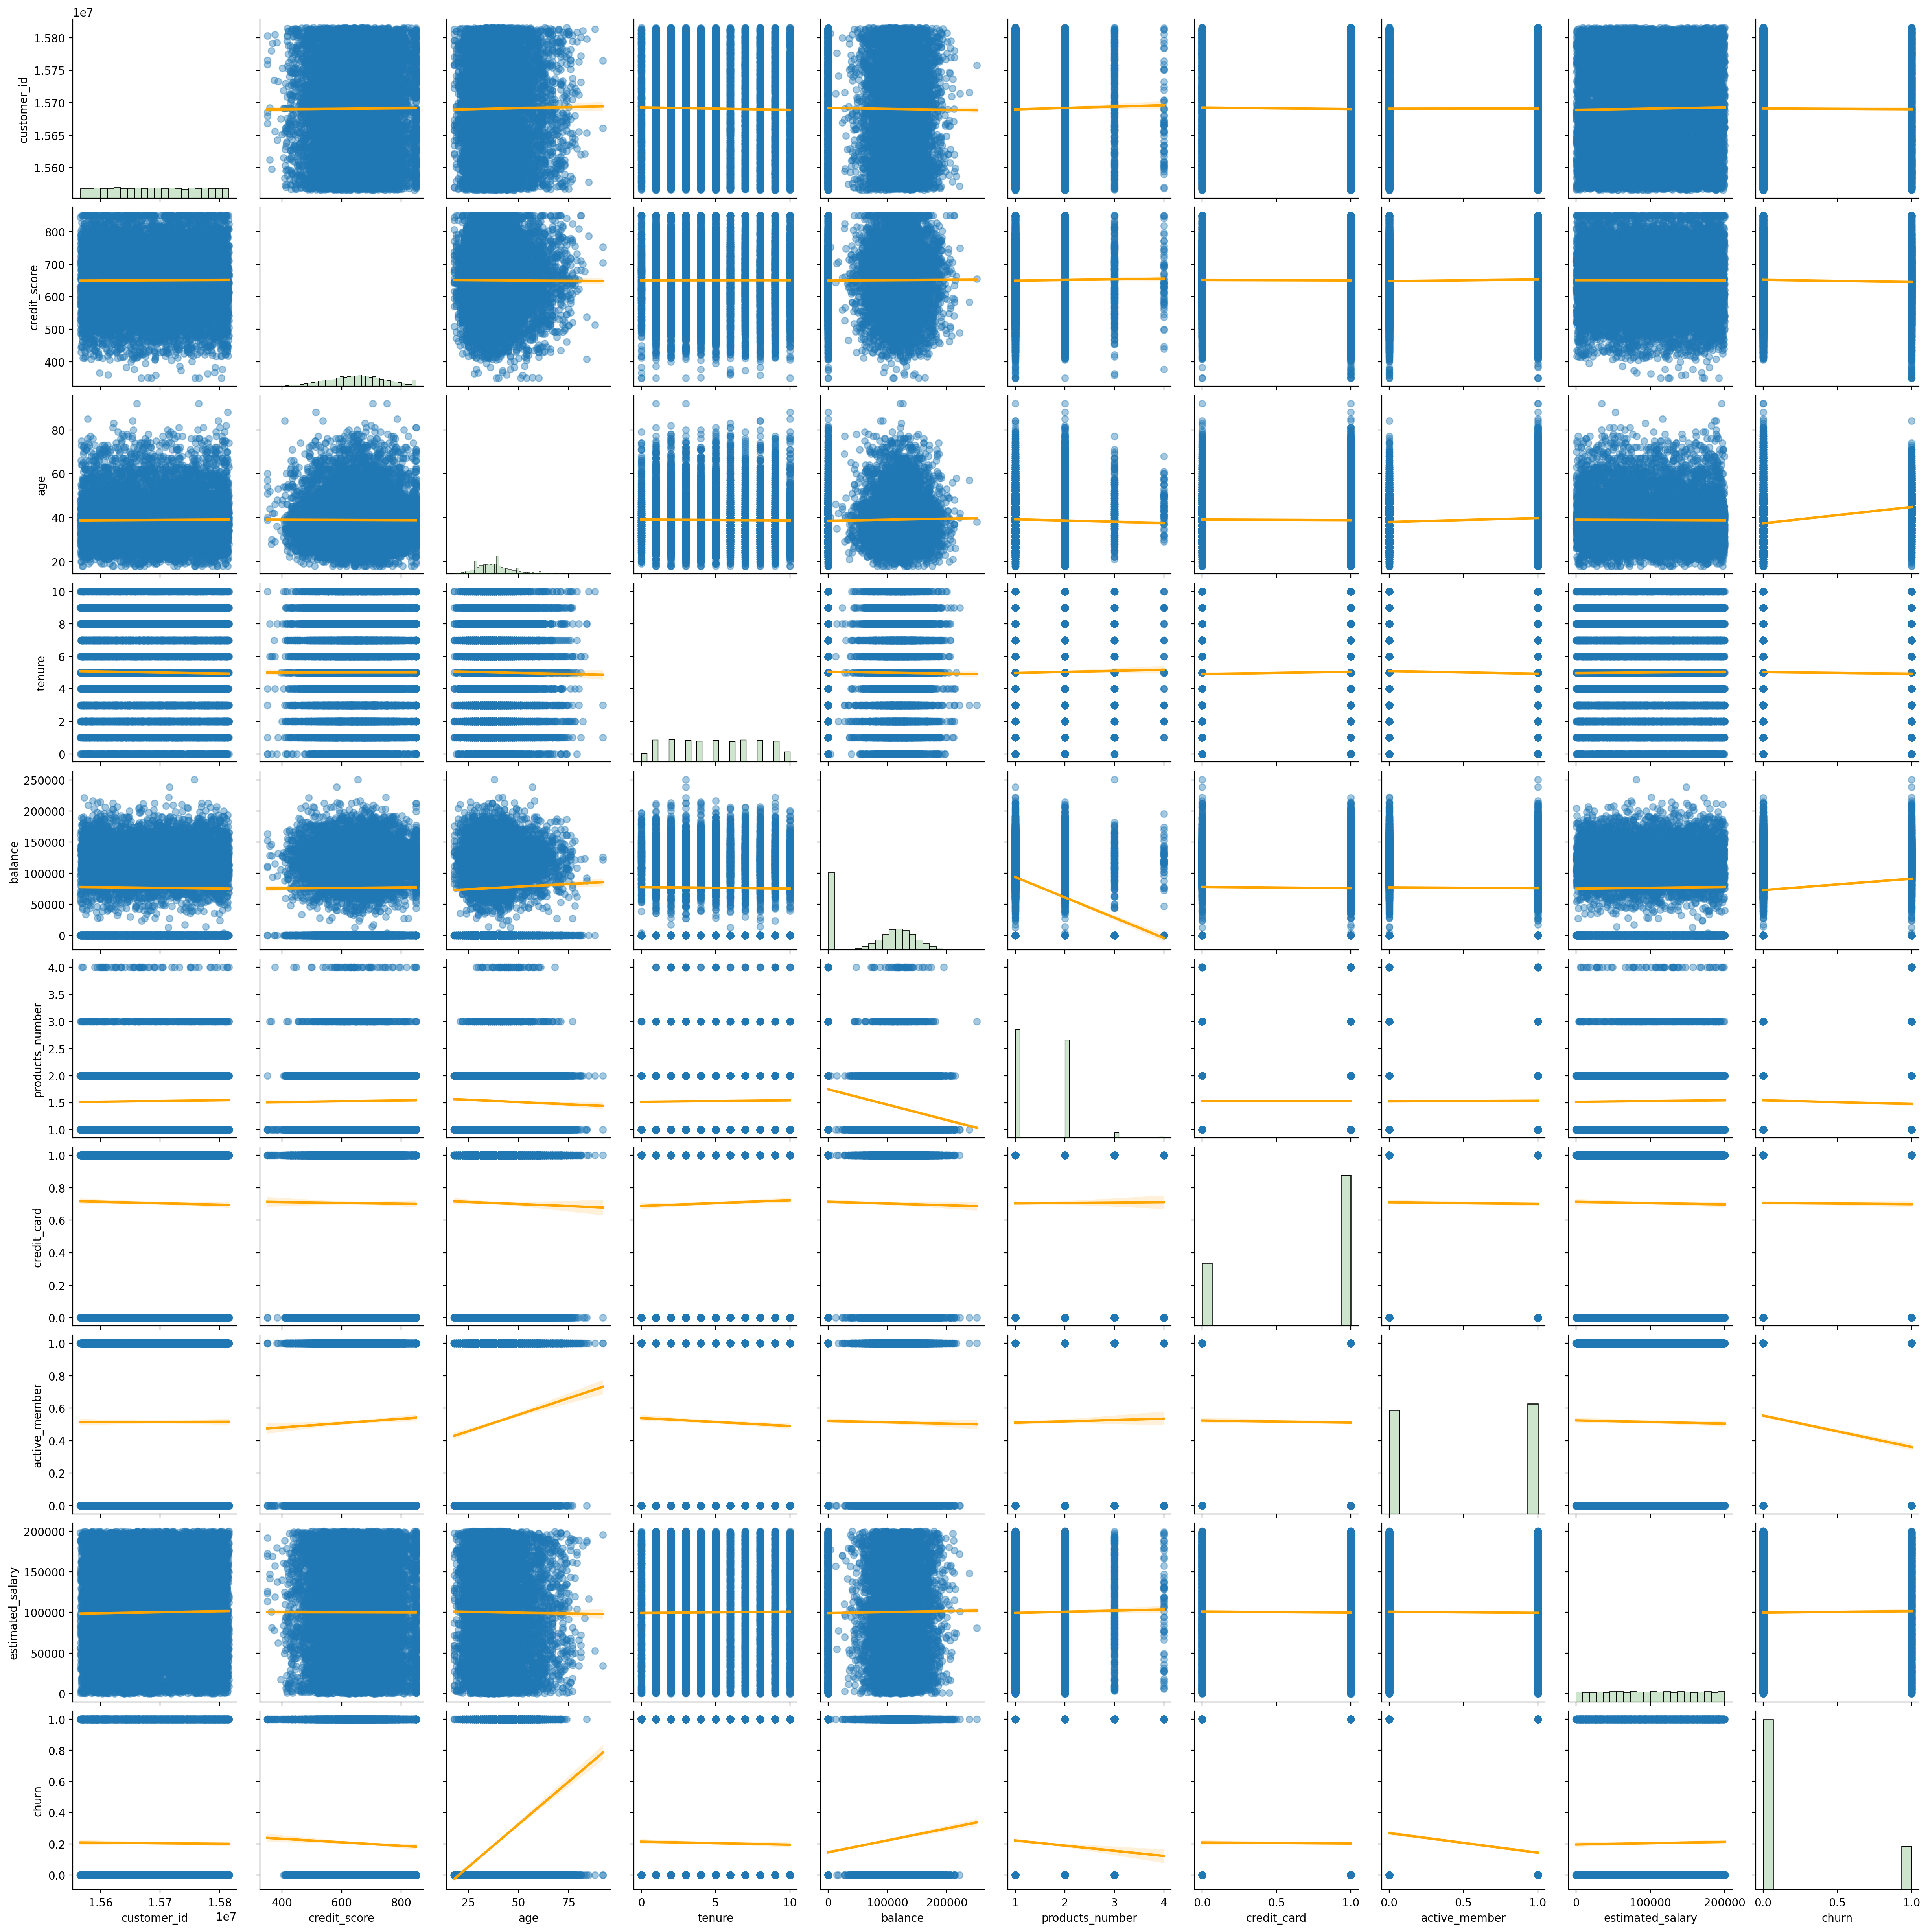

In [5]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [7]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### Feature selection with RandomForestClassifier

In [8]:
#feature selection
# model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['credit_score','age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary']]
y=df['churn']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [9]:
model.feature_importances_

array([0.16598968, 0.24957557, 0.08199769, 0.149651  , 0.12934804,
       0.01583782, 0.03919231, 0.1684079 ])

In [10]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

credit_card         0.015838
active_member       0.039192
tenure              0.081998
products_number     0.129348
balance             0.149651
credit_score        0.165990
estimated_salary    0.168408
age                 0.249576
dtype: float64

In [11]:
fs.sum()

1.0

<Axes: >

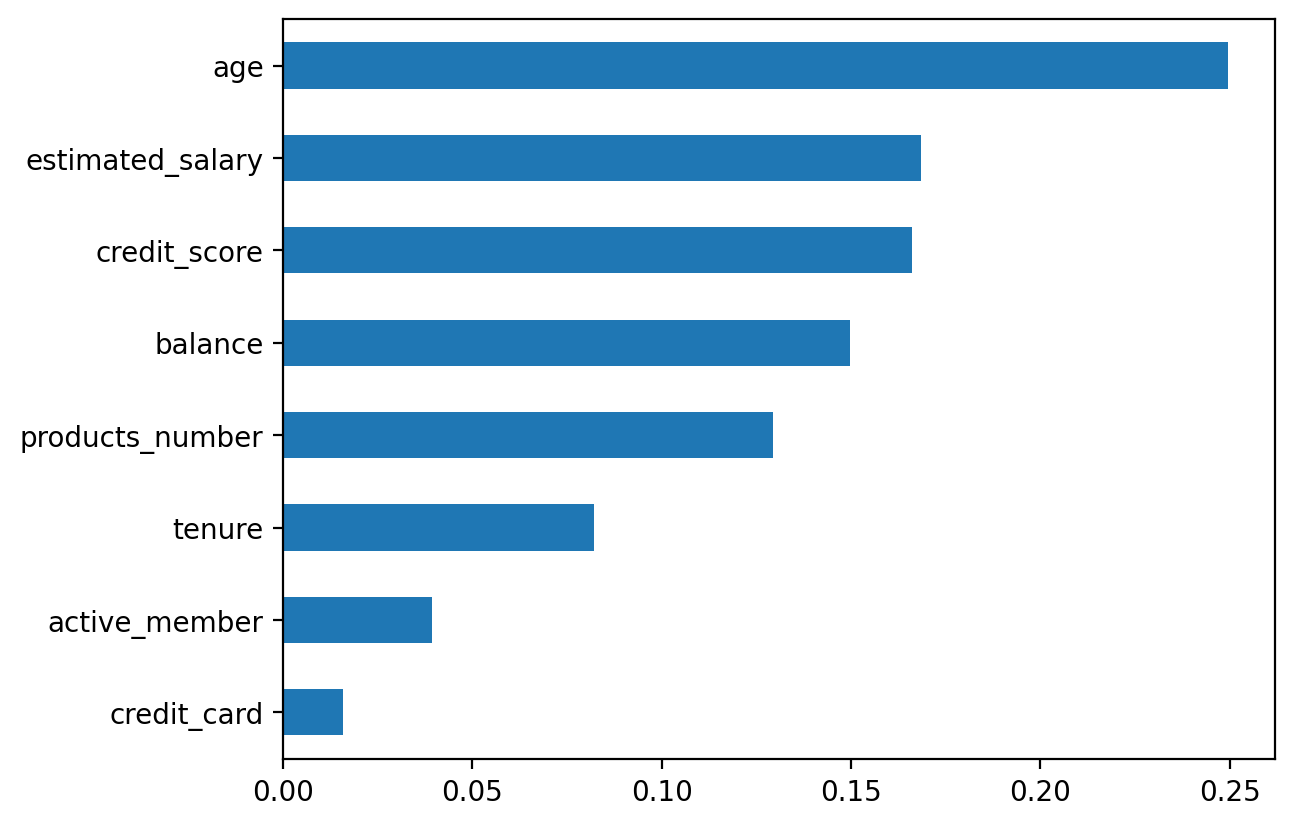

In [12]:
fs.plot(kind='barh')

In [13]:
fs[fs > .1]

products_number     0.129348
balance             0.149651
credit_score        0.165990
estimated_salary    0.168408
age                 0.249576
dtype: float64

In [14]:
fs.nlargest(4) #.index

age                 0.249576
estimated_salary    0.168408
credit_score        0.165990
balance             0.149651
dtype: float64

In [15]:
fs[fs > .1].index

Index(['products_number', 'balance', 'credit_score', 'estimated_salary',
       'age'],
      dtype='object')

In [16]:
X=df[fs[fs > .1].index]
X.head()

products_number    balance  credit_score  estimated_salary  age
0                1       0.00           619         101348.88   42
1                1   83807.86           608         112542.58   41
2                3  159660.80           502         113931.57   42
3                2       0.00           699          93826.63   39
4                1  125510.82           850          79084.10   43

In [17]:
#X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X=df[['age','estimated_salary','credit_score','balance']]
# X=df[fs[fs > .1].index]
y=df['churn']

In [18]:
# use stratify to split train/test
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

In [19]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    #[Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    #[BaggingClassifier(), 'BaggingClassifier'],
    #[AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    #[MLPClassifier(), 'MLPClassifier'],
    #[SVC(kernel='linear'), 'SVC_linear'],
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.7600
[[2224  165]
 [ 555   56]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2389
           1       0.25      0.09      0.13       611

    accuracy                           0.76      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.69      0.76      0.71      3000

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7873
[[2327   62]
 [ 576   35]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2389
           1       0.36      0.06      0.10       611

    accuracy                           0.79      3000
   macro avg       0.58      0.52      0.49      3000
weighted avg       0.71      0.79      0.72      3000

----------------------------------------------------------------------------------------------------
DecisionTreeClassifi

In [20]:
model_scores

[[0.76, 'KNeighborsClassifier'],
 [0.7873333333333333, 'LogisticRegression'],
 [0.752, 'DecisionTreeClassifier'],
 [0.808, 'GradientBoostingClassifier'],
 [0.808, 'RandomForestClassifier'],
 [0.7863333333333333, 'GaussianNB']]

In [21]:
a=pd.Series(model_scores).sort_values(ascending=True)
a

2             [0.752, DecisionTreeClassifier]
0                [0.76, KNeighborsClassifier]
5            [0.7863333333333333, GaussianNB]
1    [0.7873333333333333, LogisticRegression]
3         [0.808, GradientBoostingClassifier]
4             [0.808, RandomForestClassifier]
dtype: object

### Feature selection with DecisionTreeClassifier

In [22]:
#feature selection
model1= DecisionTreeClassifier(random_state=7)
# model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['credit_score','age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary']]
y=df['churn']
model1.fit(X,y)

DecisionTreeClassifier(random_state=7)

In [23]:
model1.feature_importances_

array([0.16676974, 0.23088326, 0.07514835, 0.15061916, 0.11862002,
       0.01488759, 0.05531746, 0.18775442])

In [24]:
fs1=pd.Series(model1.feature_importances_, index=X.columns).sort_values(ascending=True)
fs1

credit_card         0.014888
active_member       0.055317
tenure              0.075148
products_number     0.118620
balance             0.150619
credit_score        0.166770
estimated_salary    0.187754
age                 0.230883
dtype: float64

In [25]:
#RandomForestClassifier
fs[fs > .1]

products_number     0.129348
balance             0.149651
credit_score        0.165990
estimated_salary    0.168408
age                 0.249576
dtype: float64

In [26]:
# DecisionTreeClassifier
fs1[fs1 > .12]

balance             0.150619
credit_score        0.166770
estimated_salary    0.187754
age                 0.230883
dtype: float64

In [27]:
fs1.nlargest(4) #.index

age                 0.230883
estimated_salary    0.187754
credit_score        0.166770
balance             0.150619
dtype: float64

In [28]:
X1=df[fs1[fs1 > .12].index]
X1.head()

balance  credit_score  estimated_salary  age
0       0.00           619         101348.88   42
1   83807.86           608         112542.58   41
2  159660.80           502         113931.57   42
3       0.00           699          93826.63   39
4  125510.82           850          79084.10   43

In [29]:
#X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X1=df[['age', 'estimated_salary', 'credit_score', 'balance']]
# X=df[fs[fs > .1].index]
y1=df['churn']

In [30]:
# use stratify to split train/test
test_size=.3
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                    test_size=test_size,
                                                    stratify=y1,
                                                    random_state=7)

In [37]:
algo1=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    #[Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    #[BaggingClassifier(), 'BaggingClassifier'],
    #[AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    #[MLPClassifier(), 'MLPClassifier'],
    #[SVC(kernel='linear'), 'SVC_linear'],
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model1_scores=[]
for a in algo1:
    model1 = a[0]
    model1.fit(X1_train, y1_train)
    score=model1.score(X1_test, y1_test)
    model1_scores.append([score, a[1]])
    y_pred=model.predict(X1_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y1_test, y_pred))
    print(metrics.classification_report(y1_test, y_pred))
    print('-' * 100)

print(model1_scores)
print(f'best score = {max(model1_scores)}')

KNeighborsClassifier score: 0.7600
[[2316   73]
 [ 568   43]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2389
           1       0.37      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.50      3000
weighted avg       0.71      0.79      0.72      3000

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7873
[[2316   73]
 [ 568   43]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2389
           1       0.37      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.50      3000
weighted avg       0.71      0.79      0.72      3000

----------------------------------------------------------------------------------------------------
DecisionTreeClassifi

In [38]:
model1_scores

[[0.76, 'KNeighborsClassifier'],
 [0.7873333333333333, 'LogisticRegression'],
 [0.752, 'DecisionTreeClassifier'],
 [0.808, 'GradientBoostingClassifier'],
 [0.8023333333333333, 'RandomForestClassifier'],
 [0.7863333333333333, 'GaussianNB']]

In [39]:
a1=pd.Series(model1_scores).sort_values(ascending=True)
a1

2                 [0.752, DecisionTreeClassifier]
0                    [0.76, KNeighborsClassifier]
5                [0.7863333333333333, GaussianNB]
1        [0.7873333333333333, LogisticRegression]
4    [0.8023333333333333, RandomForestClassifier]
3             [0.808, GradientBoostingClassifier]
dtype: object